### Feature Selection using LASSO

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [3]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [14]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

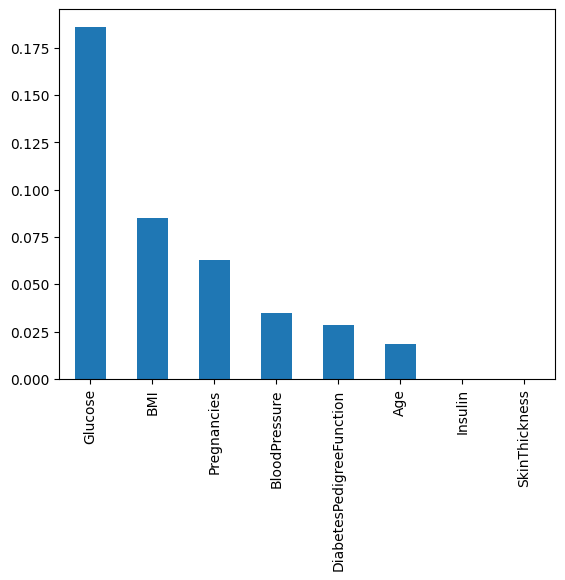

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

## Feature Selection using Decision Tree

In [16]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome', axis=1)
y= df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [18]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rf.feature_importances_

array([0.08311186, 0.25726821, 0.10053636, 0.06506041, 0.0701712 ,
       0.16811004, 0.12603077, 0.12971116])

<Axes: >

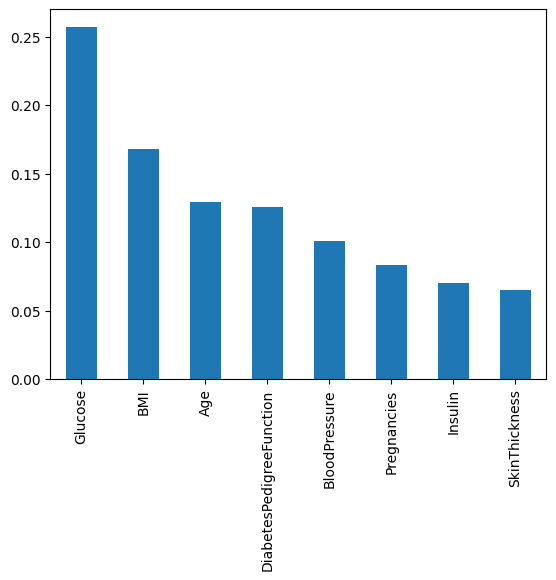

In [20]:
x = pd.Series(np.abs(rf.feature_importances_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

In [21]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
dt.feature_importances_

array([0.06942908, 0.28816202, 0.104149  , 0.06133666, 0.0339641 ,
       0.19061833, 0.10797168, 0.14436911])

<Axes: >

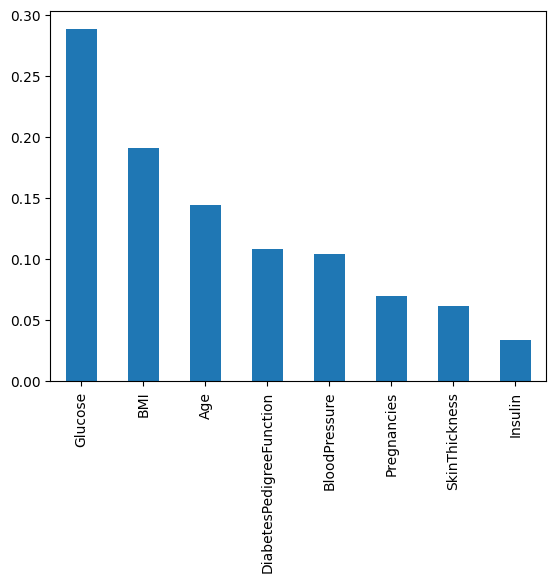

In [23]:
x = pd.Series(np.abs(dt.feature_importances_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

Embedded techniques available in sklearn

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [25]:

from sklearn.feature_selection import SelectFromModel

# Threshold is that value, below which any feature importance lies will be removed
sfm = SelectFromModel(model, threshold=0.1)

sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [26]:
# These features have feature importance greater than 0.1
sfm.get_support(indices=True)

array([1, 2, 5, 6, 7], dtype=int64)

In [27]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype=object)

In [28]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans, columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,145.0,80.0,37.9,0.637,40.0
1,129.0,62.0,41.2,0.441,38.0
2,102.0,74.0,37.2,0.204,45.0
3,120.0,78.0,25.0,0.409,64.0
4,120.0,76.0,39.7,0.215,29.0
...,...,...,...,...,...
609,157.0,74.0,39.4,0.134,30.0
610,187.0,50.0,33.9,0.826,34.0
611,126.0,90.0,43.4,0.583,42.0
612,171.0,72.0,43.6,0.479,26.0


In [29]:
# mean of all the feature importance
sfm = SelectFromModel(model, threshold='mean')

sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [30]:
sfm.get_support(indices=True)

array([1, 5, 6, 7], dtype=int64)

In [31]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [32]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans, columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,145.0,37.9,0.637,40.0
1,129.0,41.2,0.441,38.0
2,102.0,37.2,0.204,45.0
3,120.0,25.0,0.409,64.0
4,120.0,39.7,0.215,29.0
...,...,...,...,...
609,157.0,39.4,0.134,30.0
610,187.0,33.9,0.826,34.0
611,126.0,43.4,0.583,42.0
612,171.0,43.6,0.479,26.0
